In [1]:
from keras.datasets import imdb

((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

print('Dataset Loaded!')

C:\Users\91974\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


17464789/17464789 [==============================] - 25s 1us/step
Dataset Loaded!


In [2]:
print("The length of the Training Dataset is ", len(XT))
print("The length of the Testing Dataset is ", len(Xt))

The length of the Training Dataset is  25000
The length of the Testing Dataset is  25000


In [3]:
print(XT[0])
print(len(XT[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [4]:
word_idx = imdb.get_word_index()
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

1641221/1641221 [==============================] - 1s 1us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [6]:
from keras.utils import pad_sequences

In [8]:
from keras.preprocessing import sequence

X_train = pad_sequences(XT,maxlen=500)
X_test = pad_sequences(Xt,maxlen=500)

print("Padding Completed!")

Padding Completed!


In [9]:
print(X_train.shape)
print(X_test.shape)

(25000, 500)
(25000, 500)


In [11]:
from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

print("Model Compiled Successfully!")

Model Compiled Successfully!


In [13]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)
earlystop = EarlyStopping(monitor='val_acc',patience=1)

print("Callbacks Created Successfully!")

Callbacks Created Successfully!


In [14]:
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 25s 151ms/step - loss: 0.6455 - acc: 0.6180 - val_loss: 0.5577 - val_acc: 0.7140
Epoch 2/10
157/157 [==============================] - 23s 146ms/step - loss: 0.4493 - acc: 0.8033 - val_loss: 0.4476 - val_acc: 0.8012
Epoch 3/10
157/157 [==============================] - 23s 148ms/step - loss: 0.3144 - acc: 0.8745 - val_loss: 0.3748 - val_acc: 0.8306
Epoch 4/10
157/157 [==============================] - 24s 154ms/step - loss: 0.2490 - acc: 0.9042 - val_loss: 0.3695 - val_acc: 0.8540
Epoch 5/10
157/157 [==============================] - 28s 177ms/step - loss: 0.1667 - acc: 0.9392 - val_loss: 0.5063 - val_acc: 0.7822


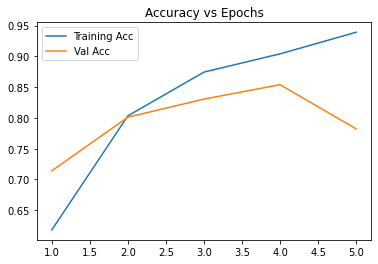

In [19]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1,len(loss)+1)

plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

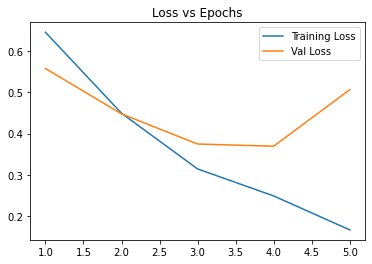

In [18]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

In [20]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 17s 22ms/step - loss: 0.4918 - acc: 0.7809


[0.4918399155139923, 0.7809200286865234]